In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp
from scipy.optimize import minimize
from scipy.optimize import LinearConstraint
from scipy.optimize import Bounds
from scipy.optimize import fsolve


In [6]:
data = pd.read_excel('/Users/wassim/Desktop/SP500 for Code.xlsx', sheet_name='SP50 2015')


In [7]:
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)
#take data frpm 2020
data = data.loc['2019-12-31':'2020-12-31']
data

,APPLE,NVIDIA,MICROSOFT,AMAZON.COM,META PLATFORMS A,ALPHABET 'A',ELI LILLY,BROADCOM,TESLA,WALMART,...,CATERPILLAR,DANAHER,S&P GLOBAL,SERVICENOW,TEXAS INSTRUMENTS,PHILIP MORRIS INTL.,WALT DISNEY,QUALCOMM,MORGAN STANLEY,PFIZER
Date,,,,,,,,,,,,,,,,,,,,,
2019-12-31,73.4125,5.8825,157.70,92.3920,205.2500,66.9695,131.43,31.602,27.8887,39.6133,...,147.68,136.0431,273.0500,282.3201,128.29,85.09,144.63,88.23,51.12,37.1406
2020-01-01,73.4125,5.8825,157.70,92.3920,205.2500,66.9695,131.43,31.602,27.8887,39.6133,...,147.68,136.0431,273.0500,282.3201,128.29,85.09,144.63,88.23,51.12,37.1406
2020-01-02,75.0875,5.9977,160.62,94.9005,209.7800,68.4340,132.21,32.239,28.6840,39.6467,...,150.53,137.4879,277.8401,291.2400,129.57,85.19,148.20,88.69,52.04,37.1027
2020-01-03,74.3575,5.9017,158.62,93.7485,208.6700,68.0760,131.77,31.419,29.5340,39.2967,...,148.44,136.6369,276.9099,291.1001,127.85,85.03,146.50,87.02,51.20,36.9037
2020-01-06,74.9500,5.9265,159.03,95.1440,212.6000,69.8905,132.26,31.372,30.1027,39.2167,...,148.34,137.0447,279.0400,292.8701,126.96,86.02,145.65,86.51,51.02,36.8563
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-25,131.9700,12.9937,222.75,158.6345,267.3999,86.7080,166.66,43.146,220.5900,47.8333,...,179.56,196.3265,316.5801,553.8899,161.64,82.51,173.73,148.79,68.09,37.2700
2020-12-28,136.6900,12.9000,224.96,164.1980,277.0000,88.6980,166.50,43.188,221.2300,48.4066,...,178.37,197.4433,318.0400,543.7400,161.47,82.49,178.86,147.74,68.05,36.8200
2020-12-29,134.8700,12.9432,224.15,166.1000,276.7800,87.8880,166.58,42.904,221.9966,48.1000,...,176.65,197.5408,321.4900,545.9800,161.18,81.87,177.30,148.49,67.71,37.0500


In [8]:
data.info()
#print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 263 entries, 2019-12-31 to 2020-12-31
Data columns (total 52 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   APPLE                     263 non-null    float64
 1   NVIDIA                    263 non-null    float64
 2   MICROSOFT                 263 non-null    float64
 3   AMAZON.COM                263 non-null    float64
 4   META PLATFORMS A          263 non-null    float64
 5   ALPHABET 'A'              263 non-null    float64
 6   ELI LILLY                 263 non-null    float64
 7   BROADCOM                  263 non-null    float64
 8   TESLA                     263 non-null    float64
 9   WALMART                   263 non-null    float64
 10  JP MORGAN CHASE & CO.     263 non-null    float64
 11  EXXON MOBIL               263 non-null    float64
 12  UNITEDHEALTH GROUP        263 non-null    float64
 13  ORACLE                    263 non-null    floa

In [9]:
returns = data.pct_change().dropna()

returns = returns[returns.sum(axis=1) != 0]

returns.head()

,APPLE,NVIDIA,MICROSOFT,AMAZON.COM,META PLATFORMS A,ALPHABET 'A',ELI LILLY,BROADCOM,TESLA,WALMART,...,CATERPILLAR,DANAHER,S&P GLOBAL,SERVICENOW,TEXAS INSTRUMENTS,PHILIP MORRIS INTL.,WALT DISNEY,QUALCOMM,MORGAN STANLEY,PFIZER
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-02,0.022816,0.019584,0.018516,0.027151,0.022071,0.021868,0.005935,0.020157,0.028517,0.000843,...,0.019298,0.010620,0.017543,0.031595,0.009977,0.001175,0.024684,0.005214,0.017997,-0.001020
2020-01-03,-0.009722,-0.016006,-0.012452,-0.012139,-0.005291,-0.005231,-0.003328,-0.025435,0.029633,-0.008828,...,-0.013884,-0.006190,-0.003348,-0.000480,-0.013275,-0.001878,-0.011471,-0.018830,-0.016141,-0.005363
2020-01-06,0.007968,0.004202,0.002585,0.014886,0.018834,0.026654,0.003719,-0.001496,0.019256,-0.002036,...,-0.000674,0.002985,0.007692,0.006080,-0.006961,0.011643,-0.005802,-0.005861,-0.003516,-0.001284
2020-01-07,-0.004703,0.012098,-0.009118,0.002092,0.002164,-0.001932,0.001890,-0.003443,0.038797,-0.009266,...,-0.013213,0.009831,0.006952,0.000136,0.019297,0.004418,0.000343,0.028436,-0.001960,-0.003345
2020-01-08,0.016086,0.001884,0.015928,-0.007809,0.010138,0.007118,0.009056,-0.012474,0.049206,-0.003431,...,0.008881,0.001025,0.014343,0.009354,0.002705,0.018981,-0.002059,-0.002922,0.012765,0.008001


In [88]:
#monthly_returns = returns.resample('M').agg(lambda x: (x+1).prod() - 1)
#monthly_returns = data.resample('M').last().pct_change().dropna()

/var/folders/dj/3wx6qp3d3v31b81648wbyc5w0000gp/T/ipykernel_92719/2900621302.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_returns = data.resample('M').last().pct_change().dropna()


,APPLE,NVIDIA,MICROSOFT,AMAZON.COM,META PLATFORMS A,ALPHABET 'A',ELI LILLY,BROADCOM,TESLA,WALMART,...,CATERPILLAR,DANAHER,S&P GLOBAL,SERVICENOW,TEXAS INSTRUMENTS,PHILIP MORRIS INTL.,WALT DISNEY,QUALCOMM,MORGAN STANLEY,PFIZER
Date,,,,,,,,,,,,,,,,,,,,,
2020-01-31,0.054010,0.004794,0.079455,0.087064,-0.016273,0.069726,0.062467,-0.034365,0.555157,-0.036604,...,-0.110577,0.048149,0.075737,0.198037,-0.059553,-0.028088,-0.043698,-0.033095,0.022300,-0.049515
2020-02-29,-0.116798,0.142301,-0.048288,-0.062214,-0.046754,-0.065279,-0.096749,-0.106633,0.026776,-0.059481,...,-0.054130,-0.101262,-0.094713,-0.035892,-0.053958,-0.010036,-0.149375,-0.082171,-0.138347,-0.102576
2020-03-31,-0.069761,-0.023964,-0.026542,0.035021,-0.133371,-0.132388,0.099818,-0.130291,-0.215557,0.055163,...,-0.066001,-0.042675,-0.078447,-0.121163,-0.124496,-0.108831,-0.178921,-0.136015,-0.244948,-0.023339
2020-04-30,0.155374,0.108801,0.136326,0.268900,0.227278,0.159000,0.114764,0.145593,0.492138,0.069796,...,0.002930,0.180984,0.195184,0.226673,0.161513,0.022478,0.119565,0.162897,0.159706,0.175243
2020-05-31,0.082165,0.214657,0.022543,-0.012785,0.099555,0.064469,-0.010929,0.072344,0.067938,0.020648,...,0.032222,0.019271,0.109738,0.103516,0.023003,-0.016622,0.084605,0.028092,0.120974,-0.004430
2020-06-30,0.147386,0.070103,0.110559,0.129567,0.008796,-0.010792,0.073423,0.083565,0.293187,-0.034498,...,0.053026,0.061341,0.013722,0.044158,0.069311,-0.044984,-0.049361,0.127720,0.092760,-0.143756
2020-07-31,0.165132,0.117607,0.007371,0.147114,0.117144,0.049293,-0.084602,0.003612,0.325011,0.080312,...,0.050435,0.152519,0.063039,0.084284,0.004568,0.096346,0.048695,0.157877,0.012008,0.176760
2020-08-31,0.214380,0.259998,0.100093,0.090461,0.155832,0.095151,-0.012642,0.095975,0.741452,0.073029,...,0.070966,0.013101,0.046167,0.097495,0.114465,0.038797,0.127672,0.127734,0.069149,-0.017932
2020-09-30,-0.102526,0.011664,-0.067397,-0.087579,-0.106753,-0.100600,-0.002493,0.049460,-0.139088,0.007633,...,0.048064,0.042912,-0.015883,0.006182,0.004502,-0.060158,-0.059073,-0.011923,-0.074818,-0.028845


In [89]:
#cov_matrix = monthly_returns.cov() * 12 # do it with corr matrix later
#mu = np.array(monthly_returns.mean()) * 12
#vol = np.array(monthly_returns.std()) * np.sqrt(12)

In [10]:
cov_matrix = returns.cov() * 252
mu = np.array(returns.mean()) * 252
vol = np.array(returns.std()) * np.sqrt(252)

In [11]:
mu, vol

(array([ 0.69879743,  0.96296437,  0.43897332,  0.63881851,  0.39027933,
         0.34201724,  0.33789674,  0.45937918,  2.53177131,  0.24124945,
         0.05454404, -0.38437255,  0.29111528,  0.27901489,  0.2420185 ,
         0.29599573,  0.12146046,  0.29265578,  0.15988162,  0.28931425,
         0.25057316,  0.02085539,  0.05080745,  0.61831674, -0.16586192,
        -0.05508911,  0.87601483,  0.4487708 ,  0.30088344,  0.1485287 ,
         0.6229232 ,  0.02119856,  0.01820794,  0.28839741,  0.1621502 ,
         0.42803403, -0.38805049,  0.30679098,  0.52899619,  0.16670666,
        -0.01375153,  0.17043822,  0.30953079,  0.42447459,  0.29388995,
         0.78949964,  0.33816051,  0.05217229,  0.34297485,  0.68212843,
         0.45471847,  0.05539426]),
 array([0.46658271, 0.57824267, 0.43891739, 0.38513565, 0.45897882,
        0.38461911, 0.42638635, 0.51306592, 0.89302709, 0.31551911,
        0.54405868, 0.52945421, 0.47955935, 0.40545884, 0.42701734,
        0.48896137, 0.30381685

In [12]:
def QP(x, cov_matrix, mu, gamma):
    
    return 0.5 * x @ cov_matrix @ x.T - gamma * mu @ x.T

In [13]:
vecteur_unitaire = np.ones(len(returns.columns))
constraints = LinearConstraint(vecteur_unitaire, 1, 1)

initial_weights = np.ones(len(returns.columns)) / len(returns.columns)

vecteur_unitaire.shape , initial_weights.shape , cov_matrix.shape, mu.shape, vol.shape

((52,), (52,), (52, 52), (52,), (52,))

In [14]:
def efficient_frontier(gamma, constraints):

    res = minimize(QP, initial_weights, args=(cov_matrix, mu, gamma), constraints=constraints)
    optimized_weights = res.x
    mu_optimized = mu @ optimized_weights
    vol_optimized = np.sqrt(optimized_weights @ cov_matrix @ optimized_weights.T)
    
    return mu_optimized, vol_optimized, optimized_weights

In [15]:
cov_matrix

,APPLE,NVIDIA,MICROSOFT,AMAZON.COM,META PLATFORMS A,ALPHABET 'A',ELI LILLY,BROADCOM,TESLA,WALMART,...,CATERPILLAR,DANAHER,S&P GLOBAL,SERVICENOW,TEXAS INSTRUMENTS,PHILIP MORRIS INTL.,WALT DISNEY,QUALCOMM,MORGAN STANLEY,PFIZER
APPLE,0.217699,0.208776,0.171845,0.125383,0.164320,0.134948,0.098311,0.165739,0.196952,0.078600,...,0.105426,0.109584,0.145893,0.160796,0.147960,0.100709,0.119631,0.173060,0.169437,0.079555
NVIDIA,0.208776,0.334365,0.213577,0.148500,0.184642,0.168502,0.101201,0.222672,0.266045,0.096564,...,0.121852,0.140085,0.190503,0.199473,0.195582,0.121240,0.140341,0.216912,0.197182,0.089537
MICROSOFT,0.171845,0.213577,0.192648,0.124898,0.153670,0.144833,0.103503,0.171490,0.197654,0.081883,...,0.105789,0.108664,0.152445,0.170723,0.152931,0.107242,0.124470,0.172094,0.168680,0.085318
AMAZON.COM,0.125383,0.148500,0.124898,0.148329,0.120612,0.100101,0.063472,0.107580,0.157915,0.054005,...,0.047765,0.064663,0.084382,0.129539,0.103818,0.048372,0.070011,0.114454,0.079712,0.044805
META PLATFORMS A,0.164320,0.184642,0.153670,0.120612,0.210662,0.140960,0.075146,0.150206,0.165215,0.056347,...,0.084218,0.088853,0.131999,0.154274,0.126931,0.084072,0.114043,0.142895,0.142755,0.065016
ALPHABET 'A',0.134948,0.168502,0.144833,0.100101,0.140960,0.147932,0.079589,0.141097,0.153609,0.057908,...,0.099844,0.087175,0.122958,0.137654,0.129032,0.090013,0.117444,0.139875,0.145917,0.076596
ELI LILLY,0.098311,0.101201,0.103503,0.063472,0.075146,0.079589,0.181805,0.087598,0.047021,0.064426,...,0.081378,0.079114,0.091109,0.103093,0.097808,0.090737,0.064046,0.088984,0.110239,0.084956
BROADCOM,0.165739,0.222672,0.171490,0.107580,0.150206,0.141097,0.087598,0.263237,0.229741,0.062080,...,0.138780,0.113470,0.181110,0.155248,0.181760,0.138768,0.153796,0.213055,0.203679,0.078735
TESLA,0.196952,0.266045,0.197654,0.157915,0.165215,0.153609,0.047021,0.229741,0.797497,0.047194,...,0.090197,0.104394,0.194588,0.189216,0.149470,0.125452,0.145407,0.194597,0.176047,0.056348
WALMART,0.078600,0.096564,0.081883,0.054005,0.056347,0.057908,0.064426,0.062080,0.047194,0.099552,...,0.050808,0.053193,0.051726,0.065106,0.079418,0.059028,0.045308,0.072054,0.073350,0.051069


In [95]:
mu_efficient_frontier = []
vol_efficient_frontier = []
weights_efficient_frontier = []

for gamma in np.linspace(-0.5,2,100):
    mu_optimized, vol_optimized, optimized_weights = efficient_frontier(gamma, constraints)
    mu_efficient_frontier.append(mu_optimized)
    vol_efficient_frontier.append(vol_optimized)
    weights_efficient_frontier.append(optimized_weights)

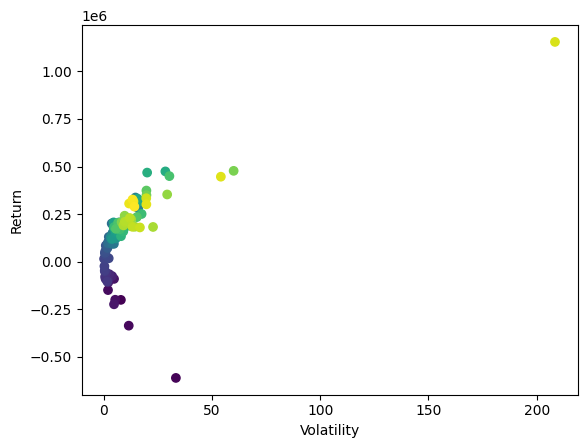

In [98]:
plt.scatter(vol_efficient_frontier ,mu_efficient_frontier , c = np.linspace(-0.5,2,100))
plt.xlabel('Volatility')
plt.ylabel('Return')
plt.show()

In [101]:
vol_efficient_frontier

[np.float64(7.844278784418812),
 np.float64(33.2668985105036),
 np.float64(11.476313281262795),
 np.float64(1.8950449891436894),
 np.float64(5.211766061364847),
 np.float64(4.676583284338965),
 np.float64(4.675999353268779),
 np.float64(2.055228104149283),
 np.float64(1.9940694216136112),
 np.float64(3.7856959807604866),
 np.float64(1.9714887685701434),
 np.float64(2.481434345052709),
 np.float64(1.7020366959831954),
 np.float64(0.7642102291591505),
 np.float64(0.5420619022937725),
 np.float64(0.9095266768955766),
 np.float64(1.5744467177437431),
 np.float64(0.4176993276314033),
 np.float64(0.39257755938304567),
 np.float64(0.239888123307293),
 np.float64(0.07639204498954198),
 np.float64(2.2263178203153635),
 np.float64(0.6636893733635917),
 np.float64(0.687483709522993),
 np.float64(0.4458174430855815),
 np.float64(0.728202629598843),
 np.float64(0.8614634520925849),
 np.float64(3.2594675184056086),
 np.float64(1.5950168311795674),
 np.float64(1.6467019014297157),
 np.float64(1.92849